# Customer Engagement and Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("marketing_dummy_datasets/customer_engagement_churn_data.csv")
df.head()

,UserID,Acquisition Channel,Engagement Score,Churned
0,U0001,Google Ads,32,Yes
1,U0002,Facebook,0,Yes
2,U0003,Facebook,18,Yes
3,U0004,Facebook,30,Yes
4,U0005,Email,79,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UserID               1000 non-null   object
 1   Acquisition Channel  1000 non-null   object
 2   Engagement Score     1000 non-null   int64 
 3   Churned              1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [11]:
df.describe(include= 'all')

,userid,acquisition_channel,engagement_score,churned
count,1000,1000,1000.00000,1000
unique,1000,5,NaN,2
top,U0001,Google Ads,NaN,Yes
freq,1,271,NaN,663
mean,NaN,NaN,48.69200,NaN
std,NaN,NaN,29.53719,NaN
min,NaN,NaN,0.00000,NaN
25%,NaN,NaN,22.00000,NaN
50%,NaN,NaN,48.00000,NaN
75%,NaN,NaN,74.00000,NaN


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df.columns

Index(['userid', 'acquisition_channel', 'engagement_score', 'churned'], dtype='object')

### Overall Churn Rate

In [27]:
churn_rate = df['churned_flag'].mean()
print(f"Overall Churn Rate: {churn_rate:.2%}")

Overall Churn Rate: 66.30%


A churn rate of over 66% indicates a significant retention challenge. Most users are leaving after acquisition, suggesting the need for urgent re-engagement strategies and better onboarding.

## Engagement Score: Churned vs. Retained

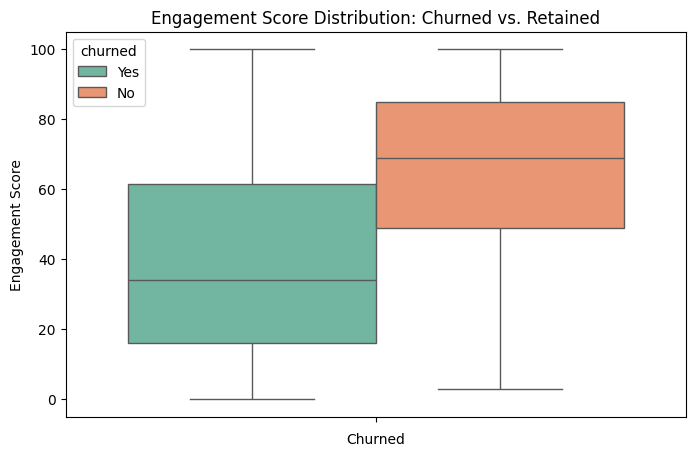

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, hue='churned', y='engagement_score', palette='Set2')
plt.title('Engagement Score Distribution: Churned vs. Retained')
plt.xlabel('Churned')
plt.ylabel('Engagement Score')
plt.show()

Retained users generally have higher engagement scores than churned users. This confirms that user engagement is a strong signal for predicting churn risk.

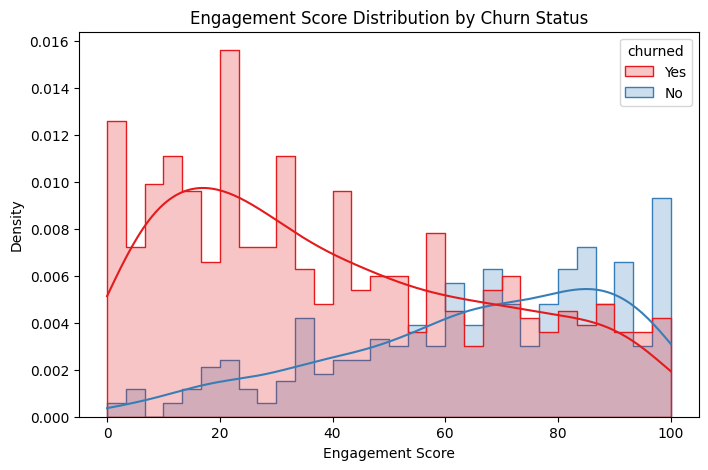

In [42]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="engagement_score", hue="churned", bins=30, kde=True, palette="Set1", element="step", stat="density")
plt.title("Engagement Score Distribution by Churn Status")
plt.xlabel("Engagement Score")
plt.ylabel("Density")
plt.show()

Churned users cluster more around the lower engagement scores, while retained users are skewed toward the higher end. There is a clear gap in engagement behavior between the two groups.

## Churn Rate By Acquisition Channel 

In [35]:
churn_by_channel = df.groupby('acquisition_channel')['churned_flag'].mean()
churn_by_channel = churn_by_channel.sort_values(ascending=False)

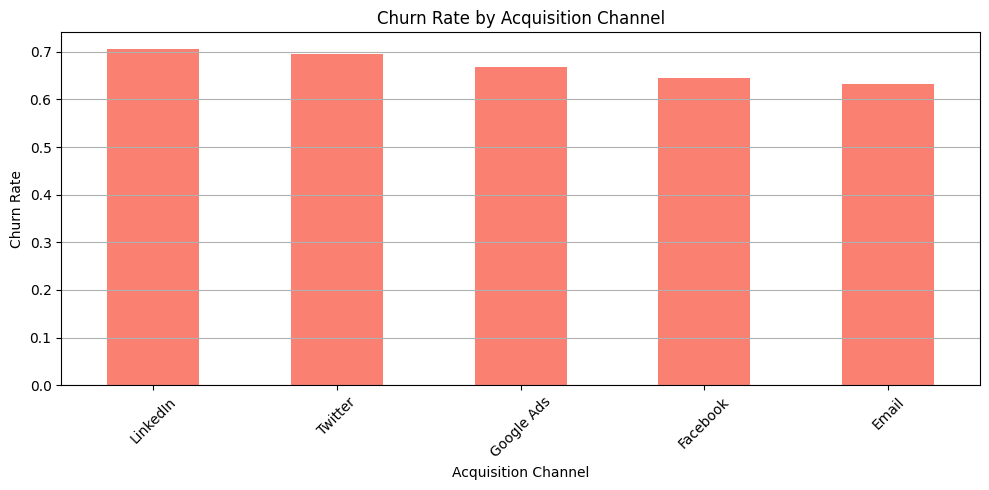

In [38]:
# Bar chart
churn_by_channel.plot(kind="bar", figsize=(10, 5), color="salmon")
plt.title("Churn Rate by Acquisition Channel")
plt.ylabel("Churn Rate")
plt.xlabel("Acquisition Channel")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Email show the highest engagement for retained users. Facebook and Google Ads show broader spreads with lower medians, suggesting inconsistency in user quality.

## Engagement Score by Acquisition Channel and Churn Status

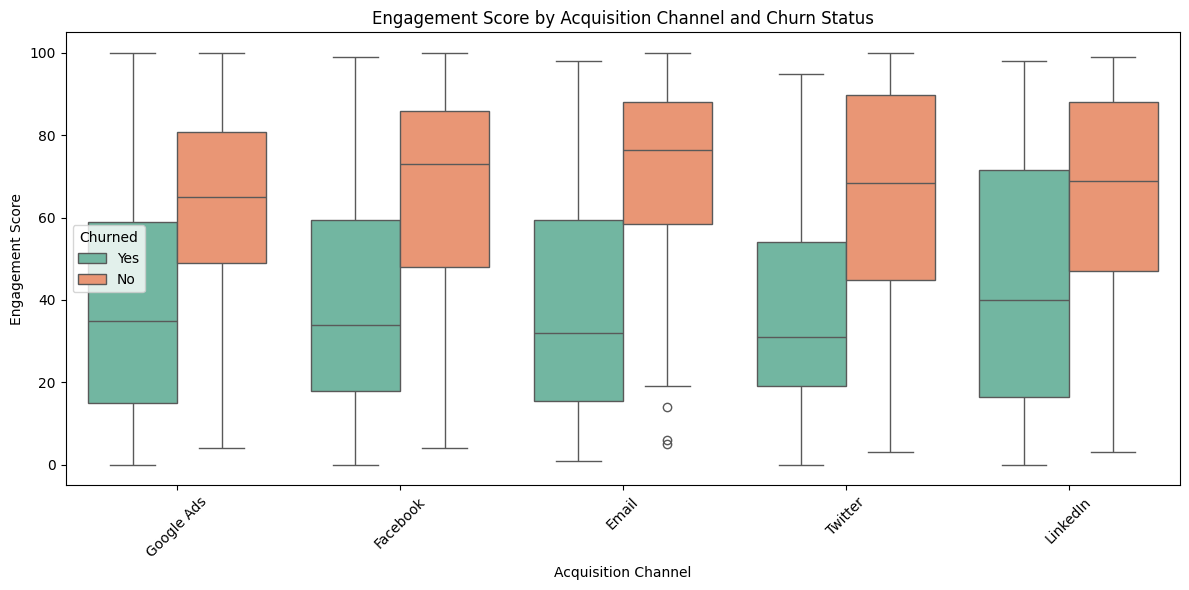

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="acquisition_channel", y="engagement_score", hue="churned", palette="Set2")
plt.title("Engagement Score by Acquisition Channel and Churn Status")
plt.xlabel("Acquisition Channel")
plt.ylabel("Engagement Score")
plt.xticks(rotation=45)
plt.legend(title="Churned")
plt.tight_layout()
plt.show()


This boxplot highlights how user engagement varies across acquisition channels and churn outcomes:

- **Email and Twitter** show the most favorable engagement profiles for retained users — high medians and tight IQRs.
- **Google Ads and Facebook** display low median scores for both churned and retained users, suggesting these channels bring in less committed users.
- **LinkedIn** presents moderate results but with opportunities for improving engagement post-acquisition.


## Conclusion

- The overall churn rate is high (**66.3%**), highlighting a pressing need to improve customer retention.
- Churned users consistently exhibit **much lower engagement scores** than retained users, confirming **engagement as a strong churn predictor**.
- Engagement distribution varies significantly by acquisition channel:
  - **Email and Twitter** show **high engagement and low churn** — ideal acquisition sources.
  - **Google Ads and Facebook** have **low engagement and high churn**, indicating poor user quality or misaligned targeting.
- This confirms that **where a user comes from** heavily influences both their engagement level and retention likelihood.

> Engagement-based segmentation and channel optimization are essential levers to improve customer lifetime value.


## Actionable Recommendations

1. **Prioritize High-Retention Channels**  
   - Double down on **Email** and **Twitter**, which show strong engagement among retained users.
   - Use these channels to attract higher-quality users.

2. **Fix or Phase Down High-Churn Sources**  
   - Investigate acquisition messaging and onboarding flows for **Facebook** and **Google Ads**.
   - Consider **budget reallocation** away from these unless performance improves.

3. **Trigger-Based Re-engagement Strategy**  
   - Use **Engagement Score < 30** as an early warning sign.
   - Automatically trigger reactivation emails, in-app nudges, or offers for low-score users.

4. **Segment and Personalize Retention Efforts**  
   - Bucket users by channel and engagement score to create **targeted retention campaigns**.
   - For example, re-onboard low-score users from Google Ads with guided walkthroughs or support.

5. **Ongoing Monitoring**  
   - Track churn and engagement metrics **monthly per channel**.
   - Add churn KPIs to marketing dashboards to inform ongoing campaign optimization.

> Retention isn't just a product problem — it's a marketing acquisition quality problem too.

